In [524]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [ ]:
# p 被判斷是否為core的點
# q 被判斷是否為p鄰居的點
# cluster_id 分群代號
# Classifications 分群list

In [525]:
def _dist(p,q):
    d=math.sqrt(np.power(p-q,2).sum())
    return d
# np.power(a,n)計算元素a的n次方
# math.sqrt用於平方

In [526]:
def _eps_neighborhood(p,q,eps):
    d=_dist(p,q) # p,q的距離
    if d <= eps:
        return True
    elif d > eps:
        return False

In [527]:
def _region_query(m, point_id, eps, classifications, cluster_id):
    n_points = m.shape[1]
    seeds = []
    p=np.array([[m[0,point_id]],[m[1,point_id]]])

    for i in range(n_points):
        q=np.array([[m[0,i]],[m[1,i]]]) # 與其他點比距離
        inside=_eps_neighborhood(p,q,eps)
        if inside==True: # 如果q為p的鄰居，append到seeds裡面
            seeds.append(i)
    return seeds


In [528]:
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    
    for point_id in range(n_points):
        if classifications[point_id]!=UNCLASSIFIED:
            continue
        elif classifications[point_id]==UNCLASSIFIED: # 還沒被判斷的點        
            seeds=_region_query(m, point_id, eps, classifications, cluster_id)
            # 如果鄰居的點的數目小於min_points，就先假設為NOISE，然後判斷下一個點
            if len(seeds)<min_points:
                classifications[point_id]=NOISE
                continue
            else: # 如果鄰居的點的數目大於等於於min_points
                classifications[point_id]=cluster_id # point_id是core，所以先分群               
                for k in seeds:                  
                    if classifications[k]<=0: # 還沒被分群的點
                        classifications[k]=cluster_id # core裡的鄰居都會被分群
                        point_id=k
                        seeds2=_region_query(m, point_id, eps, classifications, cluster_id)
                        if len(seeds2)>=min_points: # 判斷鄰居裡的點是否為core
                            seeds.extend(seeds2)
        cluster_id+=1 # 換群

    
    return classifications

In [529]:
# test here
dataset_1 = pd.read_csv("C:\Python 3.7\\blobs.csv")[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [530]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)


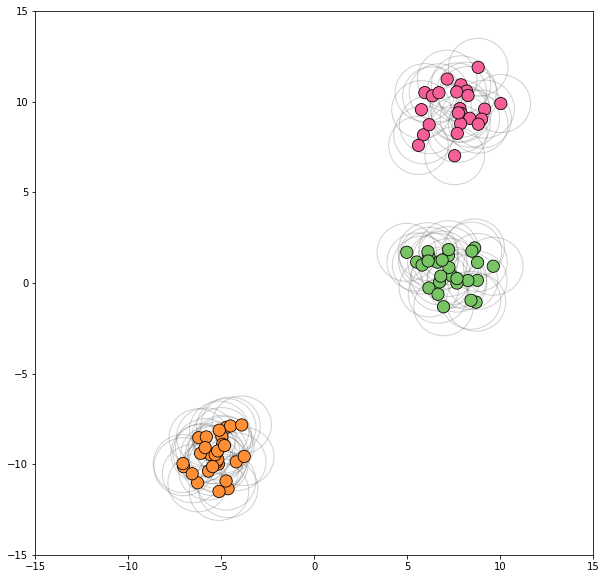

In [531]:
%matplotlib inline
import sys
sys.path.append('C:\Python 3.7\workspace')
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [532]:
dataset_2 = pd.read_csv('C:\Python 3.7\\varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [533]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)
# a

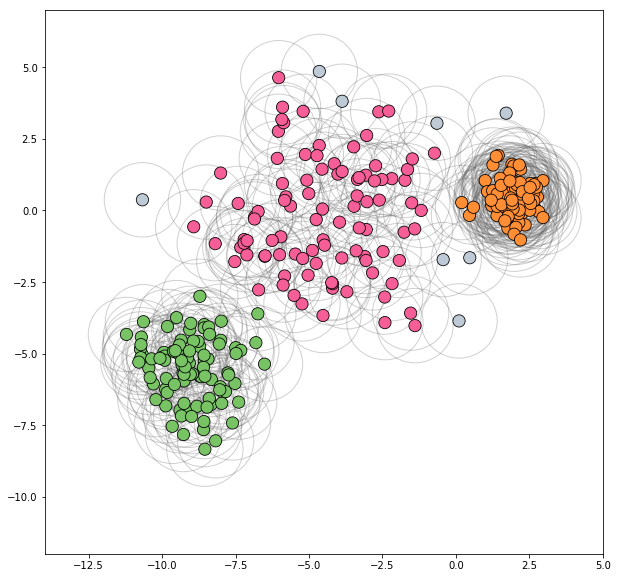

In [534]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
